In [1]:
from src.datasets.iwildcam import IWildCamDataModule
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [2]:
datamodule = IWildCamDataModule(root_dir='../data', batch_size=1)

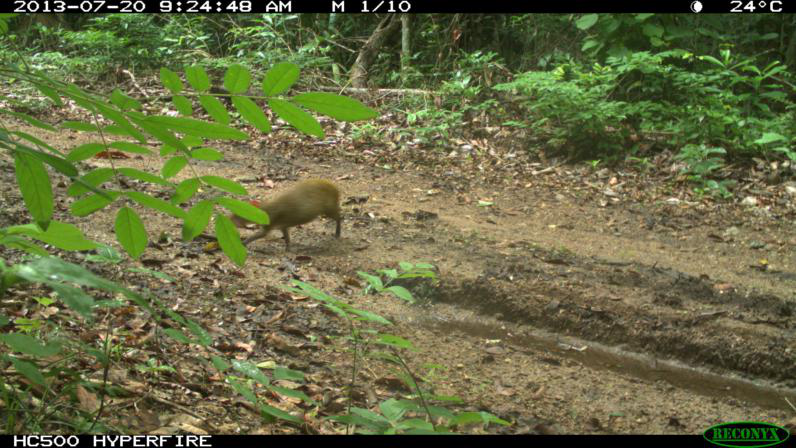

In [37]:
datamodule.dataset.get_input(100)

In [4]:
np.array(datamodule.dataset.get_input(10042)).shape

(448, 796, 3)

In [5]:
train_data = datamodule.dataset.get_subset(
            "train",
            transform=torchvision.transforms.Compose(
                [
                    torchvision.transforms.Resize((448, 448)),
                    torchvision.transforms.ToTensor(),
                ]
            ),
        )

In [25]:
datamodule.dataset._input_array

array(['97f407ac-21bc-11ea-a13a-137349068a90.jpg',
       '954d7740-21bc-11ea-a13a-137349068a90.jpg',
       '86b3a4fc-21bc-11ea-a13a-137349068a90.jpg', ...,
       '9630ac0e-21bc-11ea-a13a-137349068a90.jpg',
       '9234e9ee-21bc-11ea-a13a-137349068a90.jpg',
       '90906168-21bc-11ea-a13a-137349068a90.jpg'], dtype=object)

Label: This image is labelled as 8 out of 182 classes in iwildcam
Domain: This image is in location 2 out of 323
Metadata: {'location': 2, 'sequence': 2053, 'year': 2013, 'month': 5, 'day': 5, 'hour': 22, 'minute': 25, 'second': 31, 'y': 8}


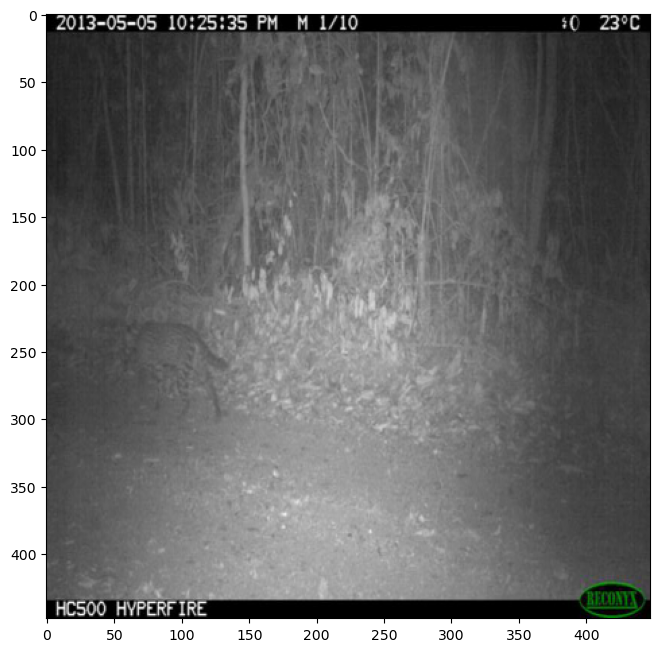

In [30]:
# https://github.com/p-lambda/wilds/blob/main/wilds/datasets/iwildcam_dataset.py

fig = plt.figure(figsize=(8,8), dpi=100)
x, y, metadata = train_data[1000]
metadata = dict(zip(datamodule.dataset._metadata_fields, metadata.tolist()))
plt.imshow(np.dstack(x))
print(f'Label: This image is labelled as {int(y)} out of {datamodule.dataset._n_classes} classes in iwildcam')
print(f'Domain: This image is in location {metadata["location"]} out of {datamodule.dataset._n_groups}')
print('Metadata:', metadata)